In [3]:
import pandas as pd
import numpy as np
Data=pd.read_csv("Titanic_Dataset.csv")


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from joblib import load

### 1. Exploratory Data Analysis (EDA):

In [15]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##### **Informations** **utiles**: 
Port of Embarkation:
C = Cherbourg_>france
Q = Queenstown_>New Zealand
S = Southampton_>L'angleterren

In [3]:
Data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Count the number of survivors
num_survivors = Data['Survived'].sum()
num_non_survivors=891-num_survivors
print("Number of people who survived:", num_survivors)
print("Number of people who not survived:", num_non_survivors)


Number of people who survived: 342
Number of people who not survived: 549


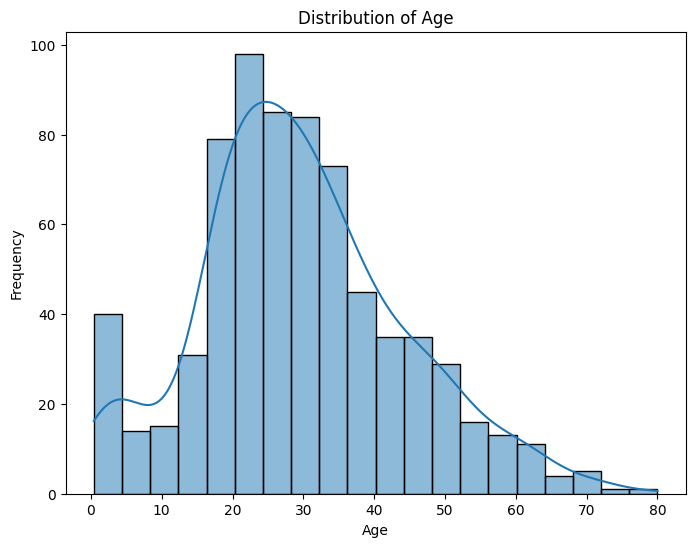

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=Data, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


- The majority of people aged 20 to 30 with a percentage of 85%.

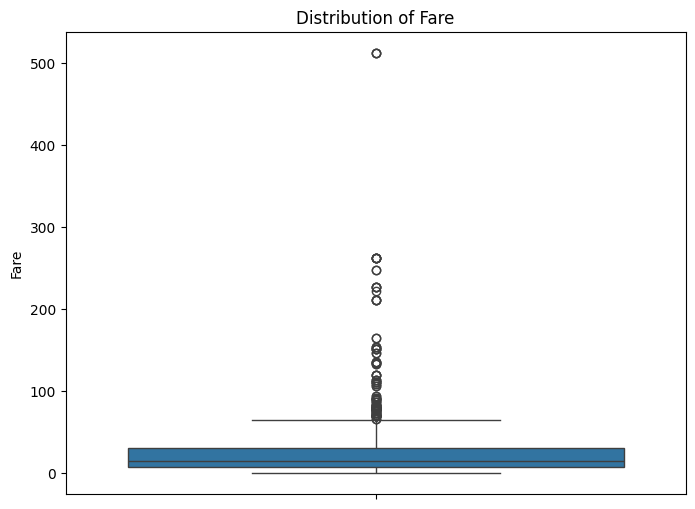

In [11]:
# Plot box plot of Fare
plt.figure(figsize=(8, 6))
sns.boxplot(data=Data, y='Fare')
plt.title('Distribution of Fare')
plt.ylabel('Fare')
plt.show()


Outliers Identification

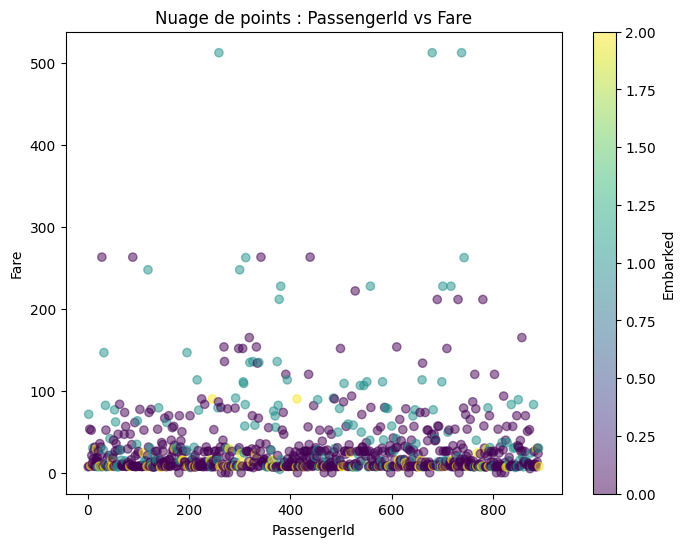

In [61]:
import matplotlib.pyplot as plt

# Create numerical codes for each port of embarkation
embarked_codes = {'S': 0, 'C': 1, 'Q': 2}
Data['Embarked_Code'] = Data['Embarked'].map(embarked_codes)

# Create a scatter plot with Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(Data['PassengerId'], Data['Fare'], alpha=0.5, c=Data['Embarked_Code'], cmap='viridis')
plt.colorbar(label='Embarked')
plt.title('Nuage de points : PassengerId vs Fare')
plt.xlabel('PassengerId')
plt.ylabel('Fare')
plt.show()



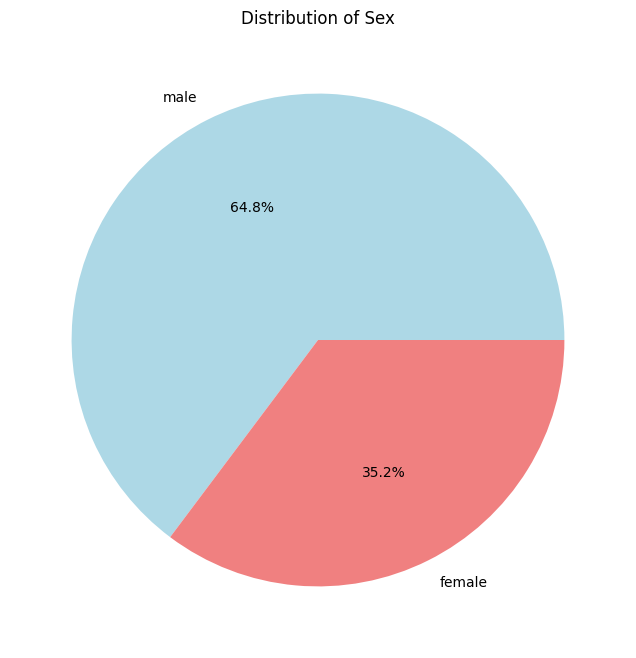

In [36]:
import matplotlib.pyplot as plt

# Calculate the counts of each sex
sex_counts = Data['Sex'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Sex')
plt.show()


- Nearly 64.8 males
- Nearly 35.2 females

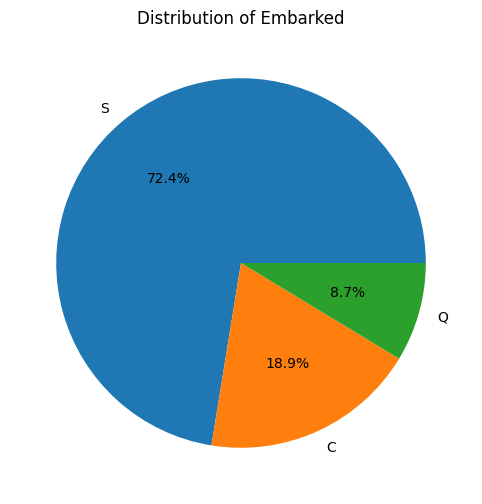

In [13]:
# Plot pie chart of Embarked
plt.figure(figsize=(8, 6))
Data['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Embarked')
plt.ylabel('')
plt.show()


- 72.4% come from England
- 8.7% come from New Zealand 
- 18.9% come from France

In [40]:
# The distibution of Survived people in terms of Ticket Class

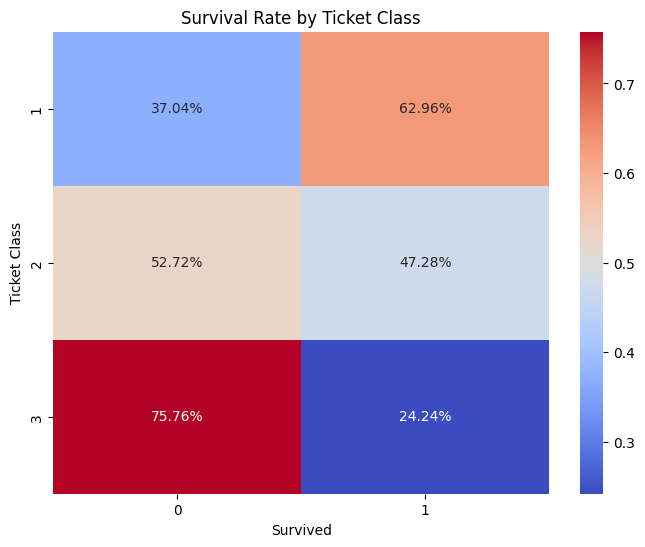

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation of 'Pclass' and 'Survived'
survival_cross_tab = pd.crosstab(Data['Pclass'], Data['Survived'], normalize='index')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(survival_cross_tab, annot=True, cmap='coolwarm', fmt=".2%")
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Survived')
plt.ylabel('Ticket Class')
plt.show()


- The most people survived have the first ticket class

In [35]:
# In terms of other factors

In [ ]:
# AGE

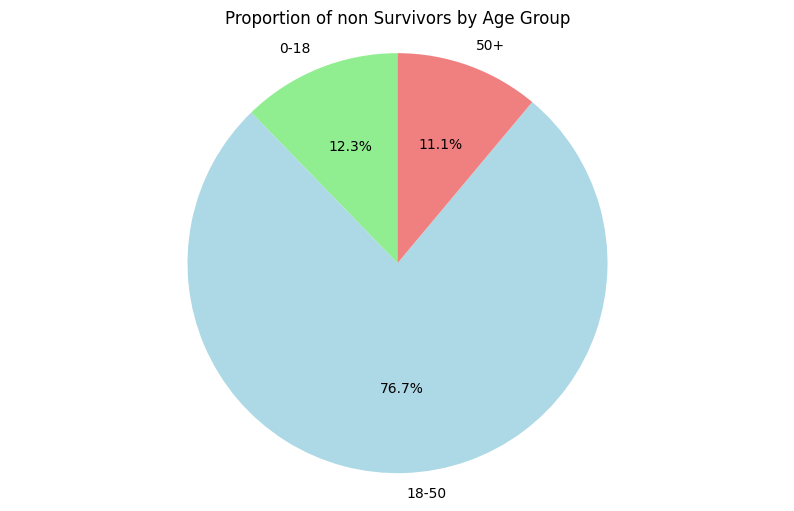

In [66]:
# Calculate the count of survivors and non-survivors for each age group
survivors_by_age_group = []
non_survivors_by_age_group = []
for interval in age_intervals:
    age_group_data = Data[(Data['Age'] >= interval[0]) & (Data['Age'] < interval[1])]
    survivors_by_age_group.append(age_group_data[age_group_data['Survived'] == 1]['Survived'].count())
    non_survivors_by_age_group.append(age_group_data[age_group_data['Survived'] == 0]['Survived'].count())

# Plot the pie chart
plt.figure(figsize=(10, 6))
labels = ['0-18', '18-50', '50+']
plt.pie(non_survivors_by_age_group, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'], startangle=90)
plt.title('Proportion of non Survivors by Age Group')
plt.axis('equal')
plt.show()


- The high percentage of non survivors is 76.7% of people aged between 18-50.

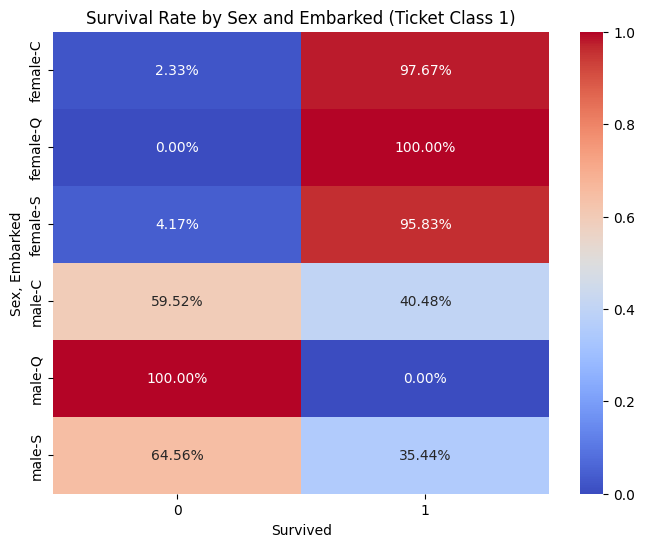

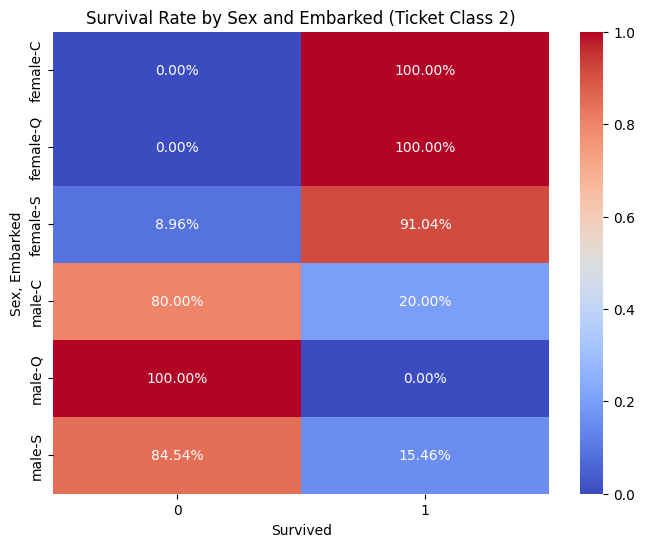

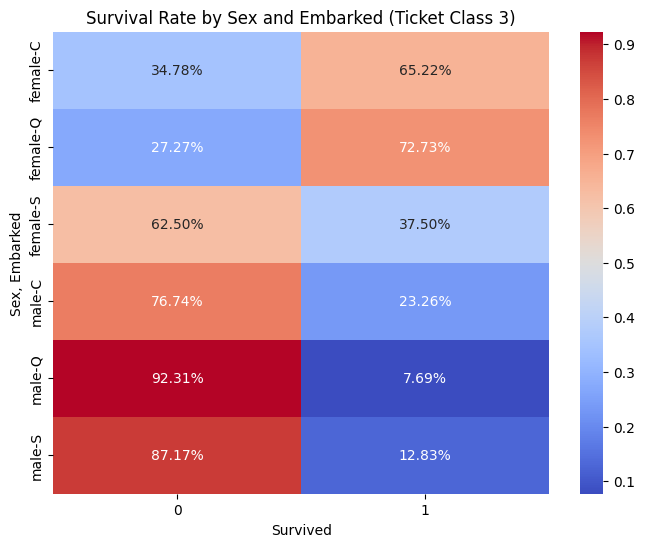

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Pclass'
grouped_by_pclass = Data.groupby('Pclass')

# Iterate over each ticket class
for pclass, group_data in grouped_by_pclass:
    # Create a cross-tabulation of multiple variables for the current ticket class
    survival_cross_tab = pd.crosstab(index=[group_data['Sex'], group_data['Embarked']],
                                     columns=group_data['Survived'],
                                     normalize='index')
    
    # Plot the heatmap for the current ticket class
    plt.figure(figsize=(8, 6))
    sns.heatmap(survival_cross_tab, annot=True, cmap='coolwarm', fmt=".2%", cbar=True)
    plt.title(f'Survival Rate by Sex and Embarked (Ticket Class {pclass})')
    plt.xlabel('Survived')
    plt.ylabel('Sex, Embarked')
    plt.show()


**Findings:**  
The most survival people are women from New Zealand, with a percentage ranging from 72% to 100%.
Conversely, the most non-survival people are men from New Zealand, with a percentage ranging from 92% to 100%.
The percentage of people from New Zealand in the dataset is 8.7%.

**Interpretation:** 
To Do

In [83]:
# In terms of family

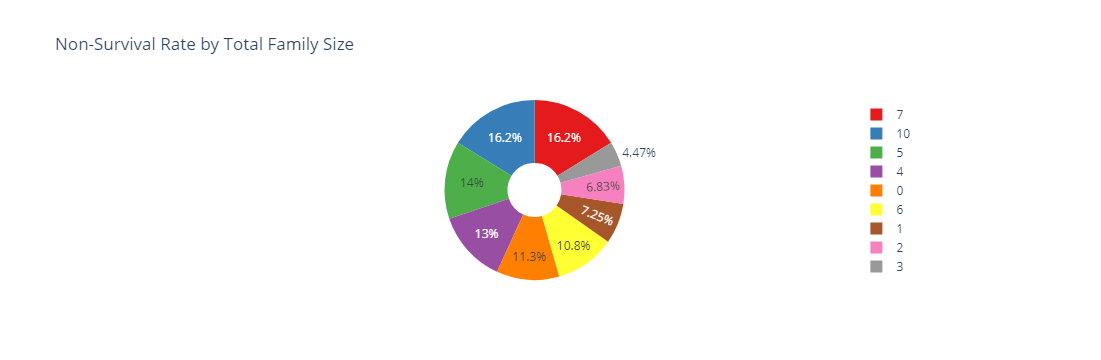

In [85]:
import plotly.express as px

# Combine 'Parch' and 'SibSp' to create a new variable representing total family size
Data['Total Family Size'] = Data['Parch'] + Data['SibSp']

# Calculate the non-survival rate for each total family size value
non_survival_rate_by_family_size = (1 - Data.groupby('Total Family Size')['Survived'].mean()) * 100

# Create a DataFrame from the non-survival rate data
non_survival_rate_df = non_survival_rate_by_family_size.reset_index()
non_survival_rate_df.columns = ['Total Family Size', 'Non-Survival Rate (%)']

# Create a Pie Chart using Plotly
fig = px.pie(non_survival_rate_df, values='Non-Survival Rate (%)', names='Total Family Size', 
             title='Non-Survival Rate by Total Family Size',
             hole=0.3, 
             color_discrete_sequence=px.colors.qualitative.Set1)

# Set the background color of the Pie Chart to white
fig.update_layout(paper_bgcolor='white')

# Show the Plotly Pie Chart
fig.show()


- The people that had a larger family size had a non-survival rate of 100%, specifically between 7 to 10 members in their family.
- 
**This observation could be explained by several factors:**- Limited Space in Lifeboats: During the Titanic disaster, the availability of lifeboats was limited, and not all passengers could be accommodated. Larger families may have struggled to find space in the lifeboats, especially if they were unable to secure spots early in the evacuation process.

- Limited Resources: The limited availability of lifeboats and resources during the evacuation process may have resulted in prioritizing the rescue of smaller family units or individual passengers.

- Priority for Women and Children: The "women and children first" policy prioritized the evacuation of women and children, potentially leaving fewer opportunities for adult males or larger family units to access lifeboats.

In [15]:
# Percentage Distribution of Family Sizes
Data.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2
Total Family Size      0
dtype: int64

In [9]:
import pandas as pd

# Calculate the total family size for each passenger
Data['Total Family Size'] = Data['Parch'] + Data['SibSp'] + 1  # Adding 1 for the passenger itself

# Calculate the percentage of each family size
family_size_percentage = Data['Total Family Size'].value_counts(normalize=True) * 100

# Sort the percentages by family size
family_size_percentage_sorted = family_size_percentage.sort_index()

# Display the percentage of each family size
print("Percentage of Family Size:")
print(family_size_percentage_sorted)


Percentage of Family Size:
Total Family Size
1     60.269360
2     18.069585
3     11.447811
4      3.254770
5      1.683502
6      2.469136
7      1.346801
8      0.673401
11     0.785634
Name: proportion, dtype: float64


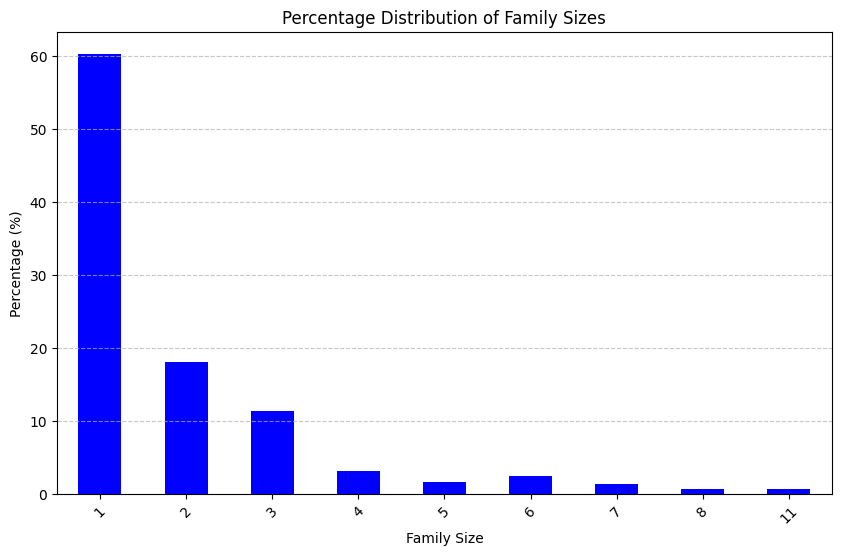

In [13]:
import matplotlib.pyplot as plt

# Plot the percentage distribution of family sizes
plt.figure(figsize=(10, 6))
family_size_percentage_sorted.plot(kind='bar', color='blue')
plt.title('Percentage Distribution of Family Sizes')
plt.xlabel('Family Size')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- The majority of people have one member in their family and they have a nonsurvival rate of 44.72%.

Let's see the percentage of people divided by categories of their family members (1-3), (4-11).

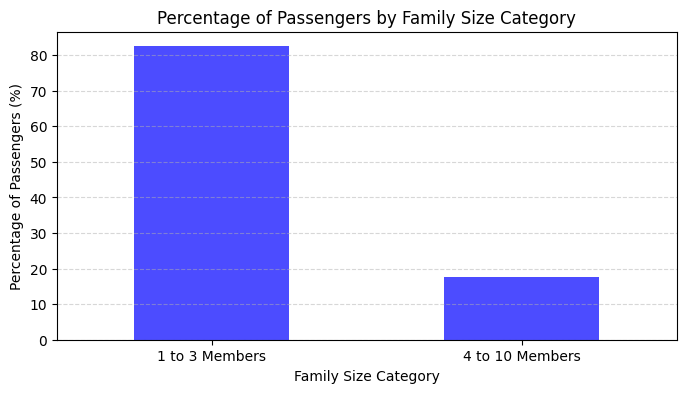

<Figure size 800x400 with 0 Axes>

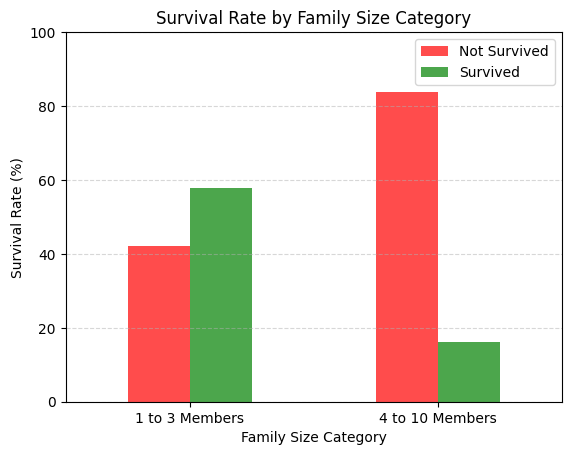

In [20]:
import matplotlib.pyplot as plt

# Define the bins for family size categories
bins = [0, 3, 10]
labels = ['1 to 3 Members', '4 to 10 Members']

# Categorize passengers based on family size
Data['Family Size Category'] = pd.cut(Data['Total Family Size'], bins=bins, labels=labels)

# Calculate the percentage of passengers in each family size category
family_size_percentage = Data['Family Size Category'].value_counts(normalize=True) * 100

# Calculate the survival rate for each family size category
survival_rate_by_family_size = pd.crosstab(Data['Family Size Category'], Data['Survived'], normalize='index') * 100

# Plot the percentage of passengers in each family size category
plt.figure(figsize=(8, 4))
family_size_percentage.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Percentage of Passengers by Family Size Category')
plt.xlabel('Family Size Category')
plt.ylabel('Percentage of Passengers (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Plot the survival rate for each family size category
plt.figure(figsize=(8, 4))
survival_rate_by_family_size.plot(kind='bar', color=['red', 'green'], alpha=0.7)
plt.title('Survival Rate by Family Size Category')
plt.xlabel('Family Size Category')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend(['Not Survived', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


- People with family sizes 4 to 11 have a high nonsurvival rate of nearly 85% compared to people who have 1 to 3  members in their family with a percentage of 42%.
- The majority (82%) of people in the dataset have 1 to 3 members in their family.
So that may indicate that people with large families are more nonsurvival compared to others.

Now let's explore other factors to gain more knowledge and insights. we will represent the relationship between Fare and ticket class if they influence the 'survived' argument.

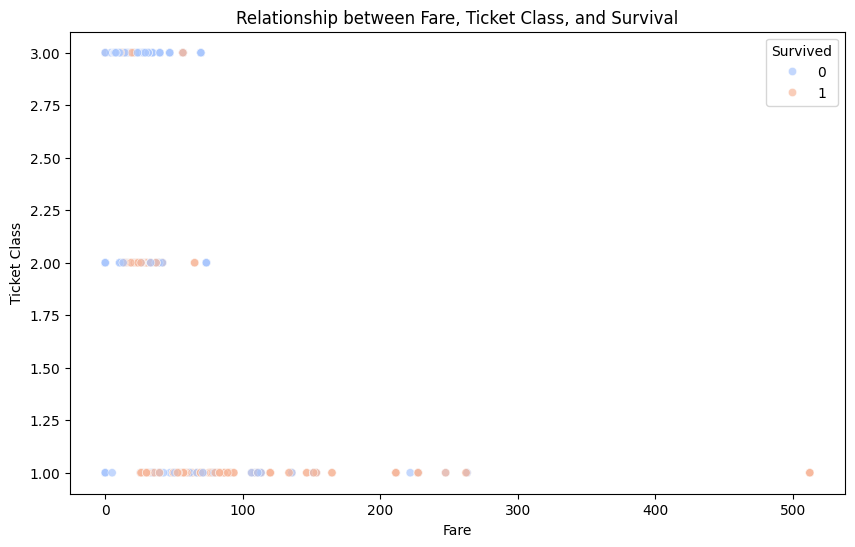

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='Fare', y='Pclass', hue='Survived', palette='coolwarm', alpha=0.7)
plt.title('Relationship between Fare, Ticket Class, and Survival')
plt.xlabel('Fare')
plt.ylabel('Ticket Class')
plt.legend(title='Survived', loc='upper right')
plt.show()


For more and clear understanding we will represent Fare vs Ticket class

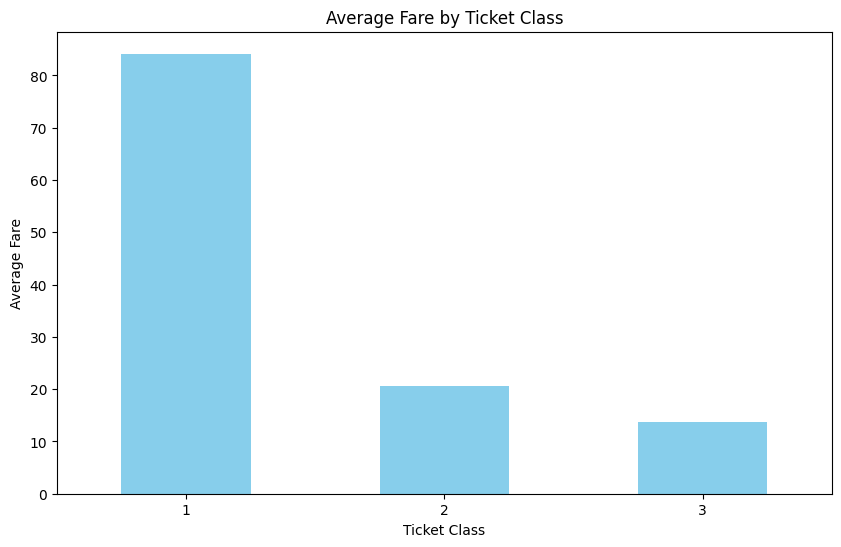

In [28]:
import matplotlib.pyplot as plt

# Calculate the average fare for each ticket class
average_fare_by_class = Data.groupby('Pclass')['Fare'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
average_fare_by_class.plot(kind='bar', color='skyblue')
plt.title('Average Fare by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()


- From the representation we can see clearly that the people in the first class paid more than those in the third class.     
And based on the previous representation of the combination of  Fare, Ticket Class, and Survival we can observe that the people who paid more were more lucky to survive compared to others.

#### Conclusion:
- The majority of people in the dataset are youth (20-30).
- The data contains 64.8% of males and 35.2% of females.
- Females are the most survival compared to the males. ---> **Explanation:** The "women and children first" policy prioritized the evacuation of women and children.
- The people that have a larger family size had a nonsurvival rate of 100% (7-10). ---> **Explanation:** The passengers with larger families may have faced challenges in evacuating the sinking ship due to difficulties in coordinating and finding space in lifeboats for all family members.
- There are 177 nan values in the 'Age' column due to a lack of information when data is collected on some people. ---> **Explanation:** may have not declared their age in the passenger list.
- There are 687 nan values in the 'Cabin' column since does not seem to provide significant predictive power for analysis we may drop it.

### 2. Data Cleaning:

We drop 'Cabin' column.

In [3]:
# Drop the 'Cabin' column from the DataFrame
Data.drop(columns=['Cabin'], inplace=True)

# Verify that the 'Cabin' column has been drop
Data.head()
Data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Managing 'Nan' values of 'Age' columns by replacing the Nan values with Avg Age based on  (sex, Pclass, Parch and the title) features.

In [4]:
# Extract titles from the 'Name' column
Data['Title'] = Data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [5]:
# Get unique categories of titles
title_categories = Data['Title'].unique()

# Print the unique title categories
print("Unique Title Categories:")
print(title_categories)

Unique Title Categories:
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [8]:
# Add a 'Title' column to the DataFrame
Data['Title'] = Data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Define a function to calculate the average age based on gender, passenger class, and title
def calculate_avg_age(group):
    if group['Title'].iloc[0] == 'Mr':
        return group['Age'].mean()
    elif group['Title'].iloc[0] == 'Master':
        return group['Age'].mean()
    elif group['Title'].iloc[0] == 'Miss' or group['Title'].iloc[0] == 'Mlle' :
        if group['Parch'].iloc[0] == 0:
            return group['Age'].mean()
        else:
            return group['Age'].mean()
    elif group['Title'].iloc[0] == 'Mrs':
        return group['Age'].mean()
    else:
        return group['Age'].mean()

# Group by 'Sex', 'Pclass', and 'Title' and calculate the average age
avg_age_by_criteria = Data.groupby(['Sex', 'Pclass', 'Title']).apply(calculate_avg_age)

# Fill missing age values in the DataFrame with the calculated averages
Data['Age'] = Data.apply(lambda x: avg_age_by_criteria.loc[x['Sex'], x['Pclass'], x['Title']] if pd.isnull(x['Age']) else x['Age'], axis=1)


In [9]:
Df=Data

In [10]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We will select these columns ['Survived','Pclass','Sex','Age','Family_Size','Fare','Embarked']  and combine them in one dataframe.

### 3. Feature Engineering:

In [11]:
# We create a new column called 'Family_Size' that contains the sum of 'Parch' and 'SibSp
Df['Family_Size'] = Df['Parch'] + Df['SibSp']

In [12]:
# Select the desired columns
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Family_Size', 'Fare', 'Embarked']

# Create a new DataFrame with the selected columns
selected_data = Df[selected_columns]

# Now 'selected_data' DataFrame contains only the selected columns
selected_data


,Survived,Pclass,Sex,Age,Family_Size,Fare,Embarked
0,0,3,male,22.000000,1,7.2500,S
1,1,1,female,38.000000,1,71.2833,C
2,1,3,female,26.000000,0,7.9250,S
3,1,1,female,35.000000,1,53.1000,S
4,0,3,male,35.000000,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,S
887,1,1,female,19.000000,0,30.0000,S
888,0,3,female,16.123188,3,23.4500,S
889,1,1,male,26.000000,0,30.0000,C


Perform  encoding for 'Sex' and 'Embarked' .

In [13]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Sex' column
selected_data['Sex'] = label_encoder.fit_transform(selected_data['Sex'])

# Encode 'Embarked' column
selected_data['Embarked'] = label_encoder.fit_transform(selected_data['Embarked'])


C:\Users\leila\AppData\Local\Temp\ipykernel_13476\3755293007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Sex'] = label_encoder.fit_transform(selected_data['Sex'])
C:\Users\leila\AppData\Local\Temp\ipykernel_13476\3755293007.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Embarked'] = label_encoder.fit_transform(selected_data['Embarked'])


In [14]:
selected_data.head()

,Survived,Pclass,Sex,Age,Family_Size,Fare,Embarked
0,0,3,1,22.0,1,7.2500,2
1,1,1,0,38.0,1,71.2833,0
2,1,3,0,26.0,0,7.9250,2
3,1,1,0,35.0,1,53.1000,2
4,0,3,1,35.0,0,8.0500,2


We normalize these columns Age,Family_Size, Fare

In [15]:
# Select the numerical columns to normalize
numerical_columns = ['Age', 'Family_Size', 'Fare']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
selected_data[numerical_columns] = scaler.fit_transform(selected_data[numerical_columns])

# Display the normalized dataset
selected_data.head()


C:\Users\leila\AppData\Local\Temp\ipykernel_13476\271920343.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[numerical_columns] = scaler.fit_transform(selected_data[numerical_columns])


,Survived,Pclass,Sex,Age,Family_Size,Fare,Embarked
0,0,3,1,0.271174,0.1,0.014151,2
1,1,1,0,0.472229,0.1,0.139136,0
2,1,3,0,0.321438,0.0,0.015469,2
3,1,1,0,0.434531,0.1,0.103644,2
4,0,3,1,0.434531,0.0,0.015713,2


In [4]:
selected_data=pd.read_csv("selected_data.csv")

In [6]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Family_Size  891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


### 3. Model Selection process:

In [7]:
# Split the data into features (X) and target variable (y)
X = selected_data.drop('Survived', axis=1)
y = selected_data['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'XGBClassifier':XGBClassifier(),
    'LGBMClassifier':LGBMClassifier(),
    'MLPClassifier':MLPClassifier(max_iter=1000)
}


### Cross-Validation

In [56]:
# Define the metrics you want to calculate
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

results = {}

for name, classifier in classifiers.items():
    scores_accuracy = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    scores_precision = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
    scores_recall = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
    scores_f1 = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
    results[name] = {
        'accuracy': scores_accuracy.mean(),
        'precision': scores_precision.mean(),
        'recall': scores_recall.mean(),
        'f1': scores_f1.mean()
    }


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### Model Evaluation:

In [57]:
for name, score in results.items():
    print(f'{name}: {score}')


Logistic Regression: {'accuracy': 0.7963163596966414, 'precision': 0.751845892929149, 'recall': 0.6824598183088748, 'f1': 0.7151427818018593}
Decision Tree: {'accuracy': 0.7627105289077118, 'precision': 0.6860493619059171, 'recall': 0.6977638015373864, 'f1': 0.6821029528368978}
Random Forest: {'accuracy': 0.7753077908007485, 'precision': 0.7269786504622698, 'recall': 0.6900768693221523, 'f1': 0.7153589992539627}
Support Vector Machine: {'accuracy': 0.8005318625036935, 'precision': 0.8451362671036364, 'recall': 0.5855345911949685, 'f1': 0.685157443076087}
GradientBoostingClassifier: {'accuracy': 0.828612232837585, 'precision': 0.8364141414141415, 'recall': 0.6828791055206149, 'f1': 0.7499859441992115}
AdaBoostClassifier: {'accuracy': 0.8005121638924455, 'precision': 0.749224525875924, 'recall': 0.7125087351502446, 'f1': 0.7288938797479985}
XGBClassifier: {'accuracy': 0.7948980596867921, 'precision': 0.7368149689025408, 'recall': 0.7088050314465408, 'f1': 0.7220309712906936}
LGBMClassifi

Based on the performance metrics , it appears that the Gradient Boosting Classifier has the highest accuracy (82.86%) among the classifiers tested. Additionally, it achieves competitive precision, recall, and F1-score values compared to other classifiers. 

### Model Training

In [9]:
# Train the model
classifier=GradientBoostingClassifier()
classifier.fit(X_train, y_train)


GradientBoostingClassifier()

### Model Evaluation on Test Set:

In [10]:
# Predict labels on the test set
y_pred = classifier.predict(X_test)

In [11]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
results= {'Accuracy': accuracy, 'Precision': precision,'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}
for metric, value in results.items():
        print(f"{metric}: {value}")

Accuracy: 0.8156424581005587
Precision: 0.8153846153846154
Recall: 0.7162162162162162
F1 Score: 0.762589928057554
ROC AUC: 0.800965250965251


In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



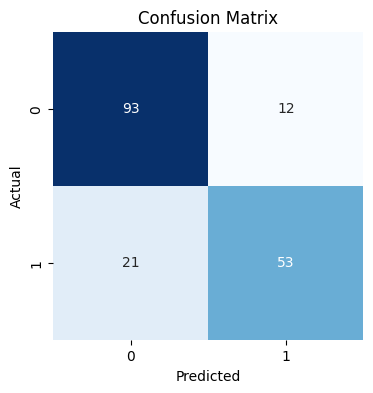

In [14]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
# Load the classifier
classifier = load('trained_model.joblib')

 **In conclusion**, this project successfully developed a predictive model to determine the likelihood of survival for passengers on the Titanic. The selected Gradient Boosting Classifier achieved an accuracy of 82%, demonstrating its effectiveness in predicting survival outcomes. This analysis contributes to our understanding of historical events like the Titanic disaster and showcases the application of machine learning techniques in predictive modeling.